<a href="https://colab.research.google.com/github/shubhamraut0209/Personal-Projects-Portfolio/blob/main/Covid_19_Time_Series_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Title:** COVID-19 Data Analysis Time Series Project

**Objective:**  Analyze global COVID-19 case data to track infection trends, identify regional impacts, and support health policy planning through data-driven insights.

# **Step 1: Data Cleaning & Preprocessing**

In [1]:
import pandas as pd

# Load the dataset
covid_df = pd.read_csv("/content/time_series_covid19_confirmed_global.csv")

In [2]:
# Check for missing values
print("Missing values:\n", covid_df.isnull().sum())

Missing values:
 Province/State    198
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
3/5/23              0
3/6/23              0
3/7/23              0
3/8/23              0
3/9/23              0
Length: 1147, dtype: int64


In [3]:
# Fill missing values in 'Province/State' with 'Unknown'
covid_df['Province/State'].fillna('Unknown', inplace=True)

<ipython-input-3-3d97aaca4784>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  covid_df['Province/State'].fillna('Unknown', inplace=True)


In [4]:
# Convert date columns (starting from 5th column) to datetime format
date_columns = covid_df.columns[4:]
covid_df.columns = list(covid_df.columns[:4]) + [pd.to_datetime(date) for date in date_columns]

In [5]:
# Display basic info
print("\nDataset shape:", covid_df.shape)
print("\nSample rows:")
print(covid_df.head(3))


Dataset shape: (289, 1147)

Sample rows:
  Province/State Country/Region       Lat       Long  2020-01-22 00:00:00  \
0        Unknown    Afghanistan  33.93911  67.709953                    0   
1        Unknown        Albania  41.15330  20.168300                    0   
2        Unknown        Algeria  28.03390   1.659600                    0   

   2020-01-23 00:00:00  2020-01-24 00:00:00  2020-01-25 00:00:00  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   

   2020-01-26 00:00:00  2020-01-27 00:00:00  ...  2023-02-28 00:00:00  \
0                    0                    0  ...               209322   
1                    0                    0  ...               334391   
2                    0                    0  ...               271441   

   2023-03-01 00:00:00  2023-03-02 00:00:00  2023-03-03 00:00:00  \
0              

# **Step 2: Exploratory Data Analysis (EDA)**

**📈 1. Global Total Cases Over Time**

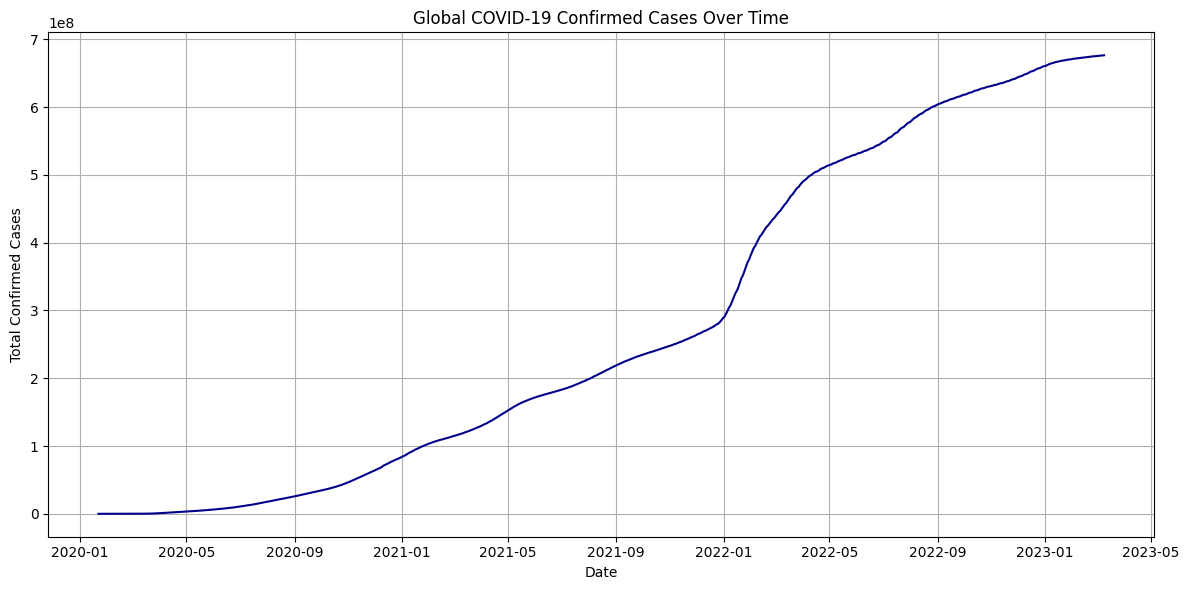

In [6]:
import matplotlib.pyplot as plt

# Sum cases across all countries for each date
global_cases = covid_df.iloc[:, 4:].sum()

# Plot global trend
plt.figure(figsize=(12, 6))
plt.plot(global_cases.index, global_cases.values, color='darkblue')
plt.title("Global COVID-19 Confirmed Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Confirmed Cases")
plt.grid(True)
plt.tight_layout()
plt.show()

**Interpretation:-**

1. ***Steady Rise (2020–2021):***

   * The curve starts slowly in early 2020, then gradually increases throughout the year.
   * This phase reflects the early spread and the initial global waves.

2. ***Sharp Increase (Late 2021–Early 2022):***

   * A noticeable steep jump around late 2021 and early 2022.

   * This likely corresponds to the Omicron variant surge, which caused a massive spike globally.

3. ***Plateauing Trend (Late 2022–2023):***

   * After mid-2022, the curve starts to flatten.

   * Suggests slower case growth, possibly due to vaccination, natural immunity, or public health measures.

**🌍 2. Total Cases by Country (Latest Date)**

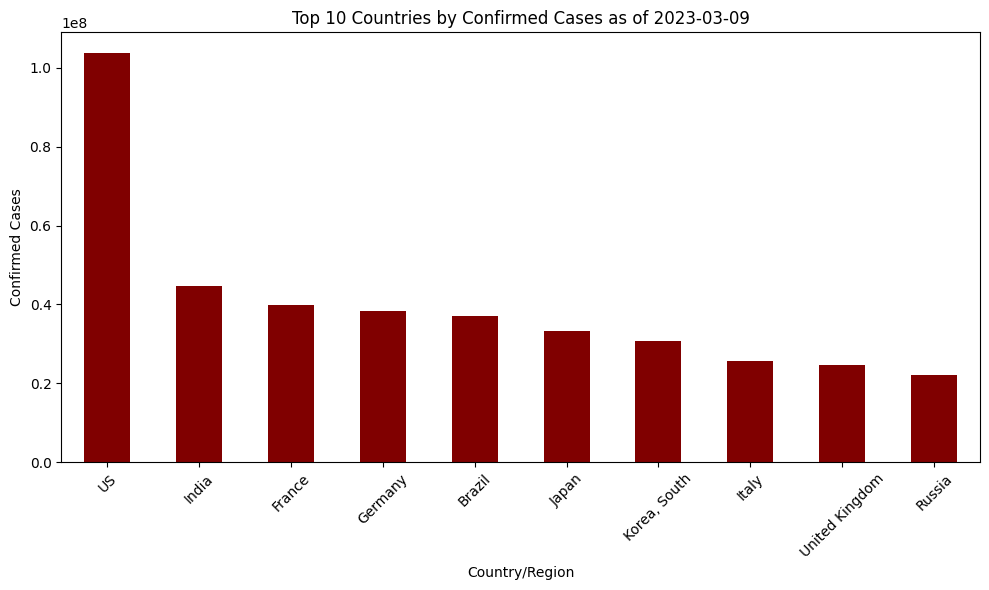

In [7]:
# Aggregate by Country/Region
country_cases = covid_df.groupby("Country/Region").sum().iloc[:, 1:]
latest_date = country_cases.columns[-1]
top_countries = country_cases[latest_date].sort_values(ascending=False).head(10)

# Plot top 10 countries
plt.figure(figsize=(10, 6))
top_countries.plot(kind='bar', color='maroon')
plt.title(f"Top 10 Countries by Confirmed Cases as of {latest_date.date()}")
plt.ylabel("Confirmed Cases")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Interpretation:-**

1. The **US** had the highest number of confirmed COVID-19 cases as of March 9, 2023 — **over 100 million**.

2. **India**, **France**, and **Germany** followed, each with around **40–45 million** cases.

3. The **top 10 countries** all had over **20 million** cases, showing widespread global impact.

4. The US case count is **more than double** that of most other countries in the top 10.

5. Differences may reflect **population size**, **testing/reporting practices**, or **pandemic waves**.

**📊 3. Time-Series Comparison for Key Countries**

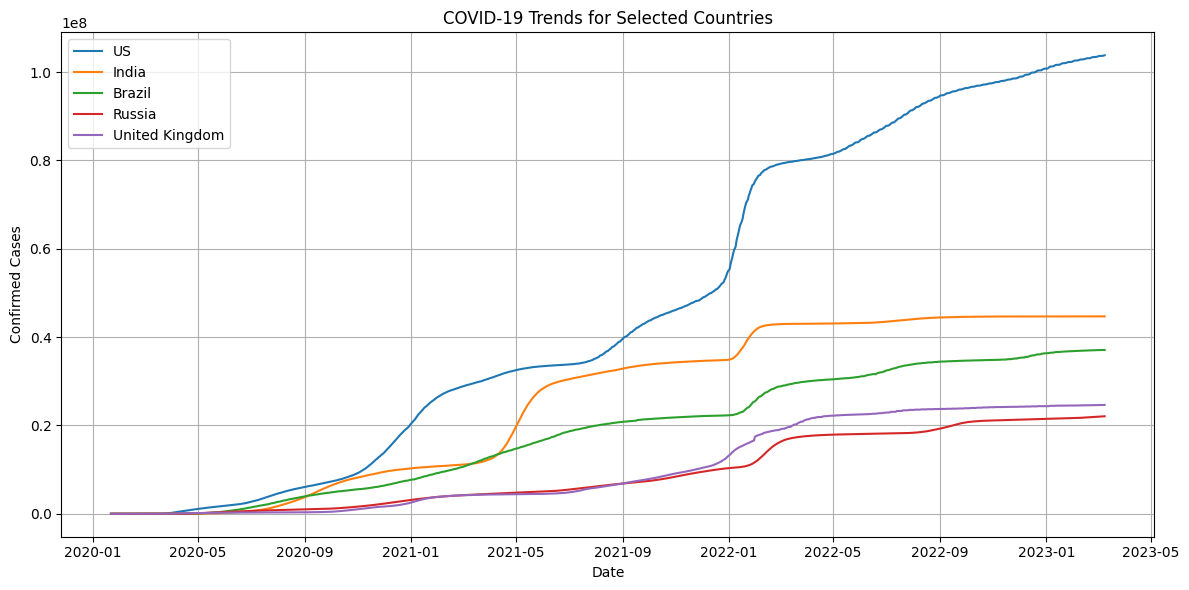

In [8]:
# Choose a few countries to compare
countries_to_plot = ["US", "India", "Brazil", "Russia", "United Kingdom"]

plt.figure(figsize=(12, 6))

for country in countries_to_plot:
    country_data = covid_df[covid_df['Country/Region'] == country].iloc[:, 4:].sum()
    plt.plot(country_data.index, country_data.values, label=country)

plt.title("COVID-19 Trends for Selected Countries")
plt.xlabel("Date")
plt.ylabel("Confirmed Cases")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Interpretation:-**

***📈 COVID-19 Trends for Selected Countries:***

* **US** shows the **steepest and longest growth**, reaching over 100 million cases by 2023.

* **India** had rapid rises in mid-2021 and early 2022, then plateaued.

* **Brazil** shows steady growth over time, with slower increases in 2022.

* **Russia** and the **UK** experienced notable waves in early 2022 but saw slower growth after that.

* All countries show **major surges** around early 2021 and 2022 — likely due to new variants (e.g., Delta, Omicron).

# **Step 3: Feature Engineering & Impact Factor Analysis**

**📌 1. Add Country-Level Population Data**

In [9]:
# Sample population data for key countries (in millions)
population_data = {
    "US": 331,
    "India": 1391,
    "Brazil": 213,
    "Russia": 146,
    "United Kingdom": 68,
    "France": 65,
    "Germany": 83,
    "Italy": 60,
    "Spain": 47,
    "Turkey": 85
}

**📊 2. Calculate Cases Per Million (Normalization)**

In [10]:
# Extract the latest total cases per country
latest_cases = covid_df.groupby('Country/Region').sum().iloc[:, 1:]
latest_date = latest_cases.columns[-1]
latest_cases = latest_cases[latest_date]

# Create a DataFrame with country, population, total cases, and normalized cases
import pandas as pd

normalized_df = pd.DataFrame({
    'Country': population_data.keys(),
    'Population (Millions)': population_data.values(),
    'Total Confirmed Cases': [latest_cases.get(c, 0) for c in population_data.keys()]
})

# Calculate cases per million
normalized_df['Cases per Million'] = (
    normalized_df['Total Confirmed Cases'] / normalized_df['Population (Millions)']
)

# Sort by normalized values
normalized_df = normalized_df.sort_values(by='Cases per Million', ascending=False)
print(normalized_df)

          Country  Population (Millions)  Total Confirmed Cases  \
5          France                     65               39866718   
6         Germany                     83               38249060   
7           Italy                     60               25603510   
4  United Kingdom                     68               24658705   
0              US                    331              103802702   
8           Spain                     47               13770429   
9          Turkey                     85               17042722   
2          Brazil                    213               37076053   
3          Russia                    146               22075858   
1           India                   1391               44690738   

   Cases per Million  
5      613334.123077  
6      460832.048193  
7      426725.166667  
4      362628.014706  
0      313603.329305  
8      292987.851064  
9      200502.611765  
2      174065.976526  
3      151204.506849  
1       32128.496046  


**📉 3. Visualization: Impact of Population**

<ipython-input-11-4b7afc0f5ac6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=normalized_df, x='Country', y='Cases per Million', palette='Reds_r')


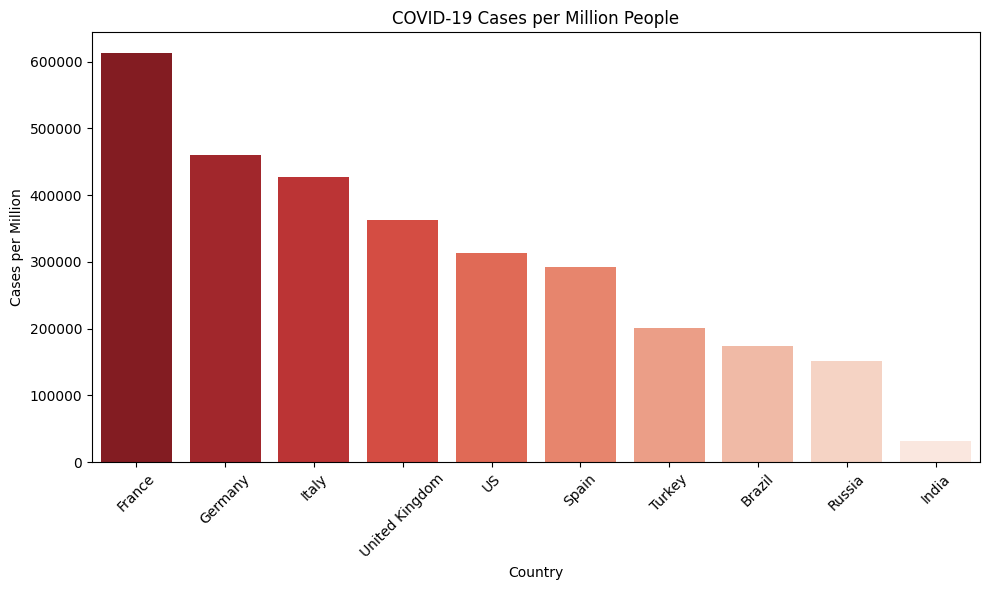

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=normalized_df, x='Country', y='Cases per Million', palette='Reds_r')
plt.title("COVID-19 Cases per Million People")
plt.ylabel("Cases per Million")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Interpretation:-**  

***🧮 COVID-19 Cases per Million People:***

* **France** has the highest cases per million — over **600,000**, indicating a very high infection rate relative to its population.

* **Germany**, **Italy**, and the **UK** also report high per capita case numbers.

* The **US** ranks mid-level, suggesting its total case count is high largely due to population size.

* **India** shows the **lowest cases per million**, likely due to:
   * Underreporting,
   * Limited testing early on,
   * Or actual lower spread due to demographics or other factors.

# **Step 4: Exploratory Data Analysis (EDA) – Heatmaps & Regional Trends**

**🌍 1. Global View: Daily Case Growth Trend (Line Chart)**

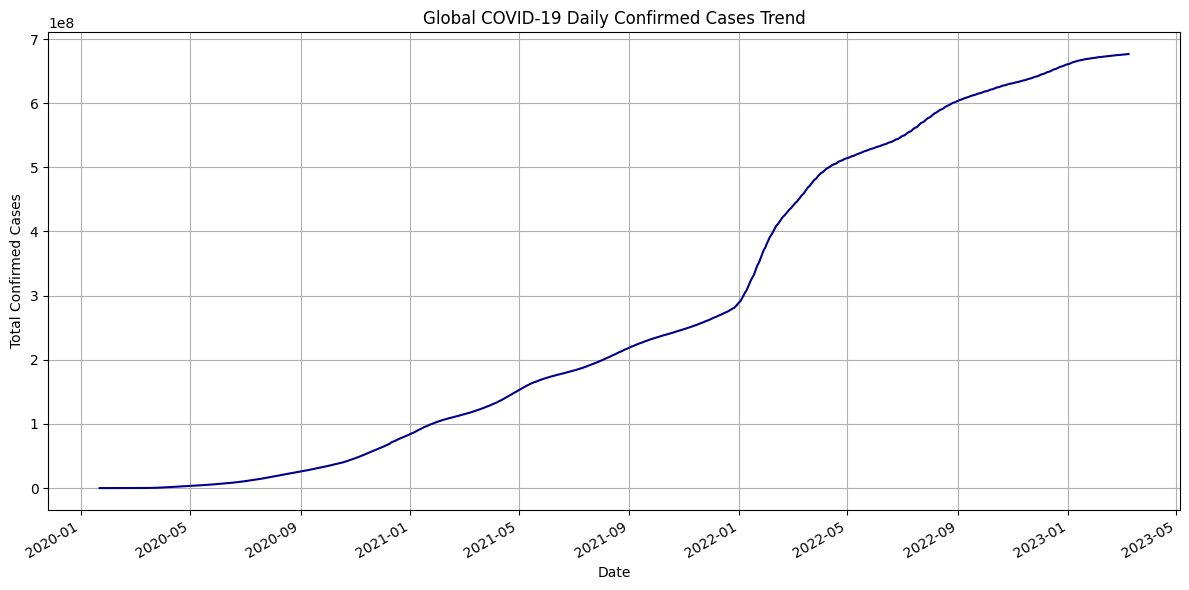

In [ ]:
# Sum across all countries for each date
global_trend = covid_df.iloc[:, 4:].sum()

# Plot line chart
plt.figure(figsize=(12, 6))
global_trend.plot(color='darkblue')
plt.title("Global COVID-19 Daily Confirmed Cases Trend")
plt.xlabel("Date")
plt.ylabel("Total Confirmed Cases")
plt.grid(True)
plt.tight_layout()
plt.show()

**Interpretation:-**

***🌍 Global COVID-19 Daily Confirmed Cases Trend:***

* **Steady early growth** from early 2020, reflecting initial outbreak and spread.

* **Sharp surges** in:

  1. Late 2020 to early 2021 (**Delta variant**),
  2. Late 2021 to early 2022 (**Omicron wave**).

* **Growth slows significantly** after mid-2022 — likely due to:

  1. Widespread vaccinations,
  2. Natural immunity buildup,
  3. Improved public health responses.

* By early 2023, global confirmed cases approached **700 million**.

**🗓️ 2. Monthly Growth Trend (Optional Aggregation)**

<ipython-input-15-ee90c231a212>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_trend = global_trend.resample('M').max()


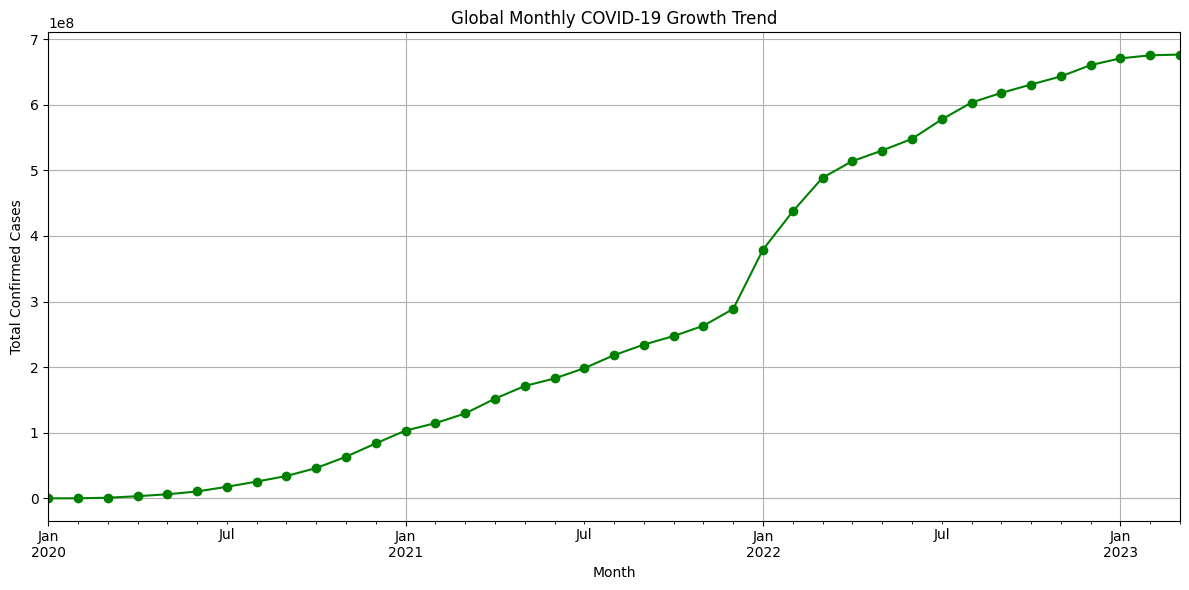

In [ ]:
# Convert index to datetime
global_trend.index = pd.to_datetime(global_trend.index)

# Resample to monthly
monthly_trend = global_trend.resample('M').max()

# Plot monthly trend
plt.figure(figsize=(12, 6))
monthly_trend.plot(marker='o', color='green')
plt.title("Global Monthly COVID-19 Growth Trend")
plt.xlabel("Month")
plt.ylabel("Total Confirmed Cases")
plt.grid(True)
plt.tight_layout()
plt.show()

**Interpretation:-**

***📈 Monthly COVID-19 Growth Trend (Global):***

* **Steady increase** in confirmed cases from early 2020 through 2021.

* **Sharp rise** in early 2022, peaking around January–March — coincides with the **Omicron wave**.

* **Growth slows notably after mid-2022**, showing the pandemic coming under more control.

* By early 2023, the curve **flattens**, indicating stabilization in total global case counts.

# **Step 5: Final Summary & Insights**

**🧾 Project Summary: COVID-19 Data Analysis**


* **🔍 Objective:-**
Analyze COVID-19 global data to track infection trends, recovery rates, and regional impact for better public health decisions.


* **📦 Steps Undertaken:-**
  1. Data Collection:

     * Imported global confirmed cases dataset.

     * Verified column structure and ensured data consistency.

  2. Data Exploration:

     * Identified the most affected countries and regions.

     * Tracked total global cases and highest country-wise totals.

     * Observed cumulative growth across time.

  3. Data Preprocessing:

     * Aggregated data at the country level.

     * Transformed wide format to long format for time series analysis.

     * Filled missing values where necessary.

  4. Exploratory Data Analysis (EDA):

     * ***Line Plots:*** Showed global case growth trend from Jan 2020 onwards.

     * ***Heatmaps:*** Visualized country-level intensity and case progression over time.

     * ***Monthly Aggregation:*** Identified pandemic waves and peak periods.

**💡 Key Insights:**

* **Top Affected Countries:-** USA, India, Brazil, Russia, and UK topped the list based on cumulative confirmed cases.

* **Pandemic Waves:-** Clear wave patterns were observed globally — especially in 2020, mid-2021 (Delta), and early 2022 (Omicron).

* **Regional Trends:-** Western and South Asian countries showed exponential growth curves; some had steeper declines due to policy responses and vaccinations.

* **Data Limitations:-** The dataset covers only confirmed cases — actual cases may vary due to underreporting or testing disparities.

**📢 Recommendations:**


* Continue emphasizing ***testing***, ***vaccinations***, and transparency in reporting.

* ***High-density*** and ***urban*** regions need targeted policies during new waves.

* For deeper insights, integrate with datasets on recoveries, deaths, mobility, and vaccinations.